In [1]:
%matplotlib inline
from IPython.display import clear_output

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import t3_ai

Using TensorFlow backend.


In [3]:
def random_move(state):
    return np.random.choice(np.argwhere(state==0).flatten())

def random_rollout():
    state = np.zeros(9)
    states = [state.copy()]
    player = np.random.randint(0,2)*2-1
    while True:
        ri = random_move(state)
        state[ri] = player
        
        states.append(state.copy())
        
        w = t3_ai.winner(state)
        if w != 0:
            #print("winner")
            return w, states
        if t3_ai.draw(state):
            #print("draw")
            return 0, states
            
        
        player *= -1

w, states = random_rollout()
print(w)
for s in states:
    t3_ai.vis(s)

1

- - - 
- - - 
- - - 

X - - 
- - - 
- - - 

X - - 
O - - 
- - - 

X X - 
O - - 
- - - 

X X - 
O - - 
- - O 

X X - 
O X - 
- - O 

X X O 
O X - 
- - O 

X X O 
O X - 
- X O 


In [61]:
x_train = None
y_train = None

first_run = True

for i in range(10000):
    w, states = random_rollout()
    states = np.array(states)
    
    targs = None
    if w == 1:
        targs = np.ones([states.shape[0], 1])
    else:
        targs = -1 * np.ones([states.shape[0], 1])
    
    if first_run:
        first_run = False
        x_train = states
        y_train = targs
    else:
        x_train = np.vstack((x_train, states))
        y_train = np.vstack((y_train, targs))

In [62]:
print("x_train: " + str(x_train.shape))
print("y_train: " + str(y_train.shape))

x_train: (86248, 9)
y_train: (86248, 1)


In [4]:
# create tictac ai
t3 = t3_ai.AI(weights_path="t3_weights-19-0.24.hdf5")

model created with # params: 353
loading model weights from path: t3_weights-19-0.24.hdf5
loaded weights


In [5]:
def best_rollout():
    state = np.zeros(9)
    states = [state.copy()]
    player = np.random.randint(0, 2)*2-1
    while True:
        if player == 1:
            # agentx
            besta = t3.best_move(state)
            state[besta] = player
            
        elif player == -1:
            ri = random_move(state)
            state[ri] = player
        
        states.append(state.copy())
        
        w = t3_ai.winner(state)
        if w != 0:
            #print("winner")
            return w, states
        if t3_ai.draw(state):
            #print("draw")
            return 0, states
            
        
        player *= -1
        
w, states = best_rollout()
print(w)
for s in states:
    t3_ai.vis(s)

1

- - - 
- - - 
- - - 

- - - 
- X - 
- - - 

- - - 
- X - 
- O - 

- - - 
- X - 
X O - 

- - - 
- X O 
X O - 

- - X 
- X O 
X O - 


In [29]:
from time import sleep
state = np.array([0,0,-1,0,1,0,0,0,0])

print("starting state")
t3_ai.vis(state)
print("\n")
sleep(4)

available = np.argwhere(state==0).flatten()
maxv = -100000
besta = -1
for a in available:
    # get its value
    test_state = state.copy()
    test_state[a] = 1
    value = t3.model.predict(test_state.reshape(1, 9))[0,0]
    clear_output(wait=True)
    print("potential state")
    t3_ai.vis(test_state)
    print(value)
    sleep(2)
    if value > maxv:
        maxv = value
        besta = a

if besta == -1:
    print('whoops, dunno the answer')

print("best square")
print(besta)

potential state

- - O 
- X - 
- - X 
0.562244
best square
8


Train on 77623 samples, validate on 8625 samples
Epoch 1/1
77623/77623 [==============================] - 3s - loss: 0.7637 - acc: 0.2655 - val_loss: 0.7524 - val_acc: 0.2806


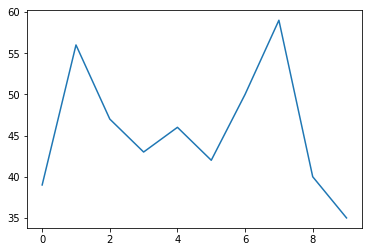

In [70]:
#t3 = t3_ai.AI()

losses = []
for i in range(10):
    clear_output(wait=True)
    t3.fit(x_train, y_train, epochs=1)
    ls = 0
    for j in range(1000):
        w, states = best_rollout()
        if w != 1:
            ls += 1
    losses.append(ls)
    
plt.plot(losses)

In [66]:
w, states = random_rollout()

s = states[np.random.randint(len(states))]
t3_ai.vis(s)
print(t3.best_move(s))


- O X 
O X X 
- O O 
6


In [67]:
wins = 0
draws = 0
losses = 0

samples = 1000
for i in range(samples):
    w, states = best_rollout()
    if w == 1:
        wins += 1
    elif w == 0:
        draws +=1
    elif w == -1:
        losses += 1
        
print("wins: {}".format(wins))
print("draws: {}".format(draws))
print("losses: {}".format(losses))

wins: 956
draws: 15
losses: 29
